## 1. Data Exploration:
* a. Load the dataset and perform exploratory data analysis (EDA).
* b. Examine the features, their types, and summary statistics.
* c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\mobin\DATASIENCE\ML Assignments\STATISTICS\Logistic Regression\New folder\Logistic Regression\Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# defining numeric and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

print('Total Numerical columns are {} and they are listed as: {}'.format(len(numeric_features), numeric_features))
print('\nTotal Categorical columns are {} and they are listed as: {}'.format(len(categorical_feature), categorical_feature))

Total Numerical columns are 7 and they are listed as: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Total Categorical columns are 5 and they are listed as: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## Univariate Analysis

**The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.**

C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\3509471383.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


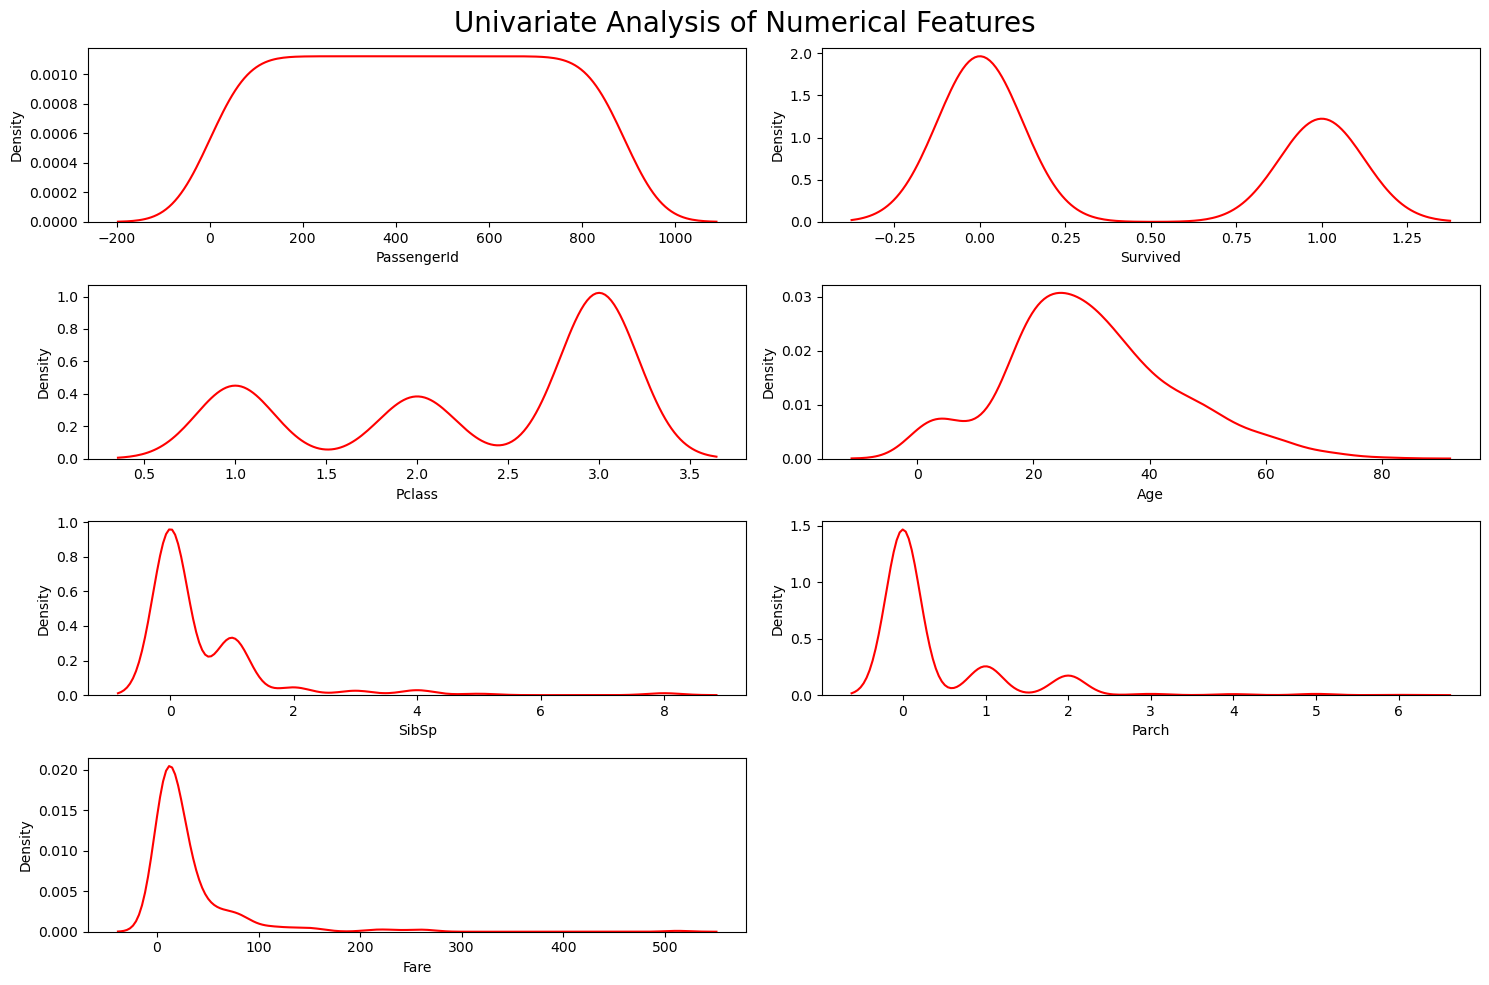

In [7]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20)

for i in range(0, len(numeric_features)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x = df[numeric_features[i]], color = 'red')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Report

* **Fare,Sibsp, and Parch are positively skewed.**
* **Age is normally distributed**

## Categorical Features

In [8]:
categorical_columns = []

for i in categorical_feature:
    print(f'{i}: {len(df[i].unique())}')
    if len(df[i].unique()) < 10:
        categorical_columns.append(i)

Name: 891
Sex: 2
Ticket: 681
Cabin: 148
Embarked: 4


In [9]:
categorical_columns

['Sex', 'Embarked']

C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\113702955.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


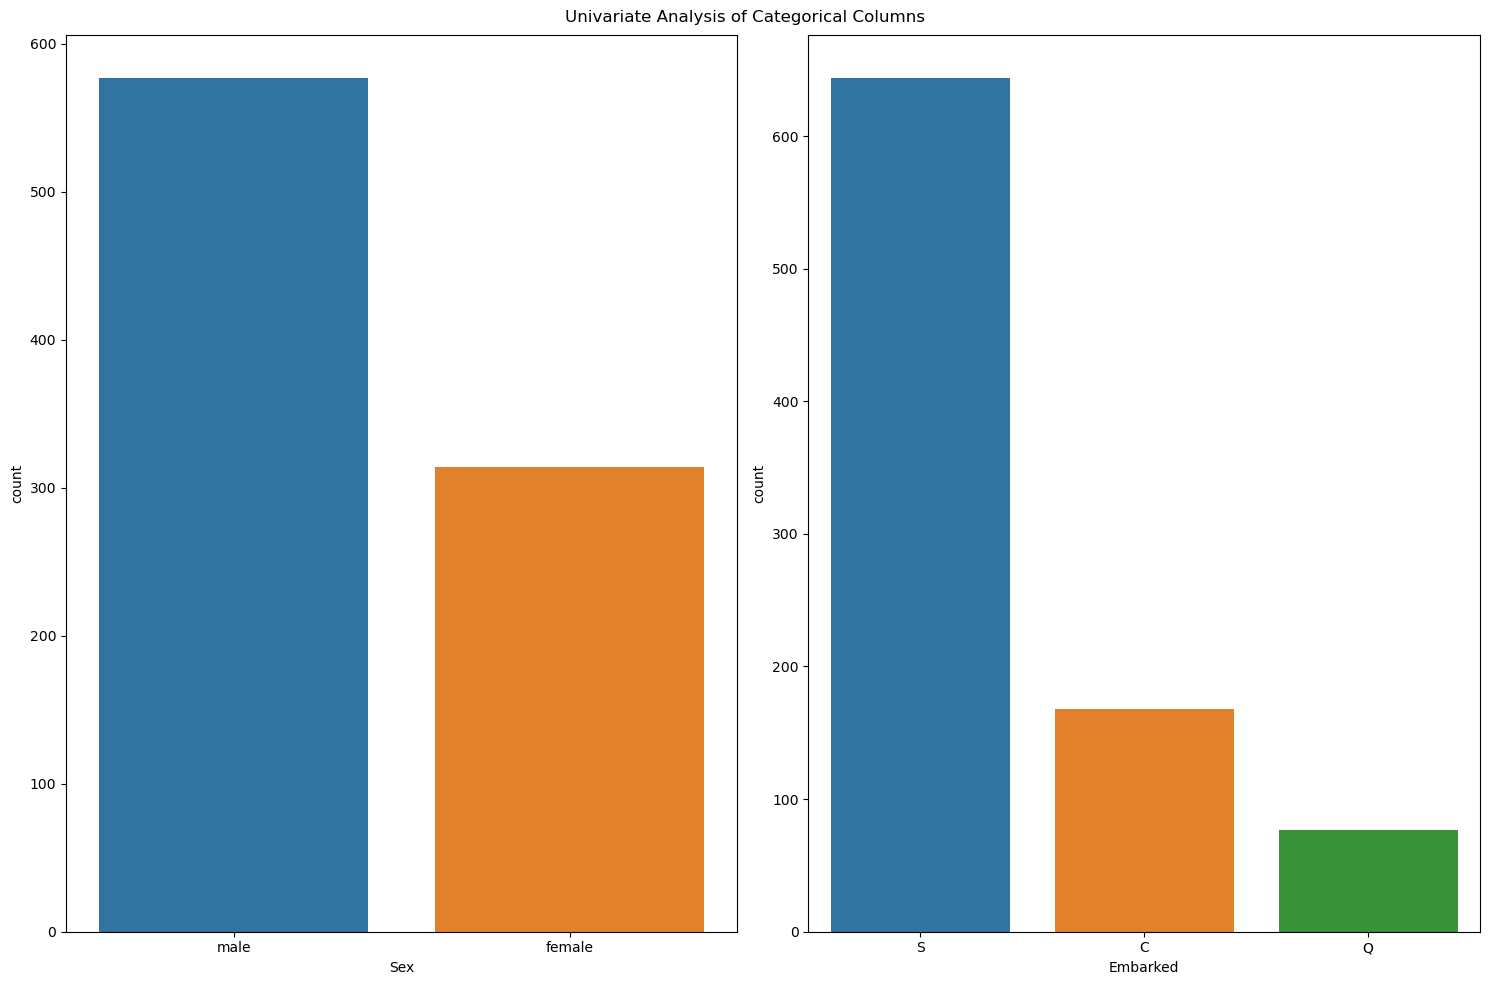

In [10]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Columns')

for i in range(0, len(categorical_columns)):
    plt.subplot(1,2,i+1)
    sns.countplot(x = df[categorical_columns[i]])
    plt.xlabel(categorical_columns[i])
    plt.tight_layout()

## Cheacking Null Values

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Multivariate Analysis

**Correlation in Numerical Features**

In [12]:
df[numeric_features].corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


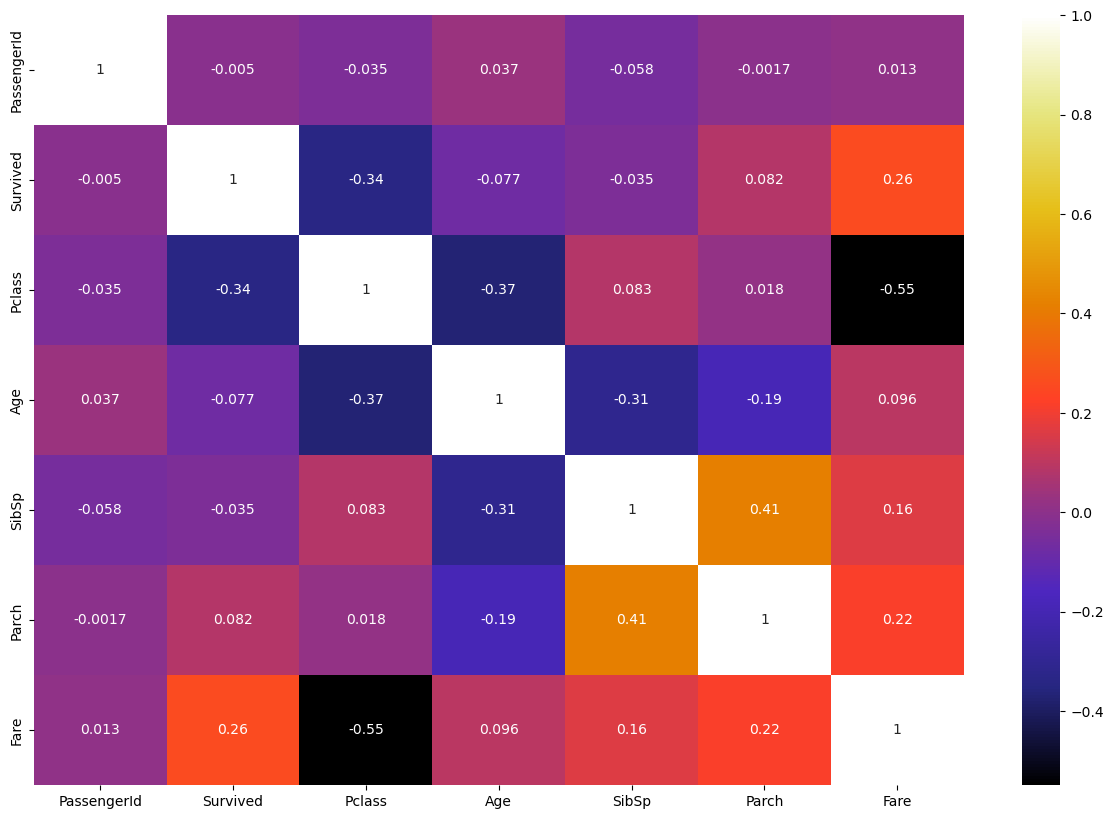

In [13]:
# applying heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_features].corr(), cmap = 'CMRmap', annot = True)
plt.show()

## Insights
* There are no Highly correlated or correlation between the columns

## Relationship between Target and Numerical Columns

C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\4237014977.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


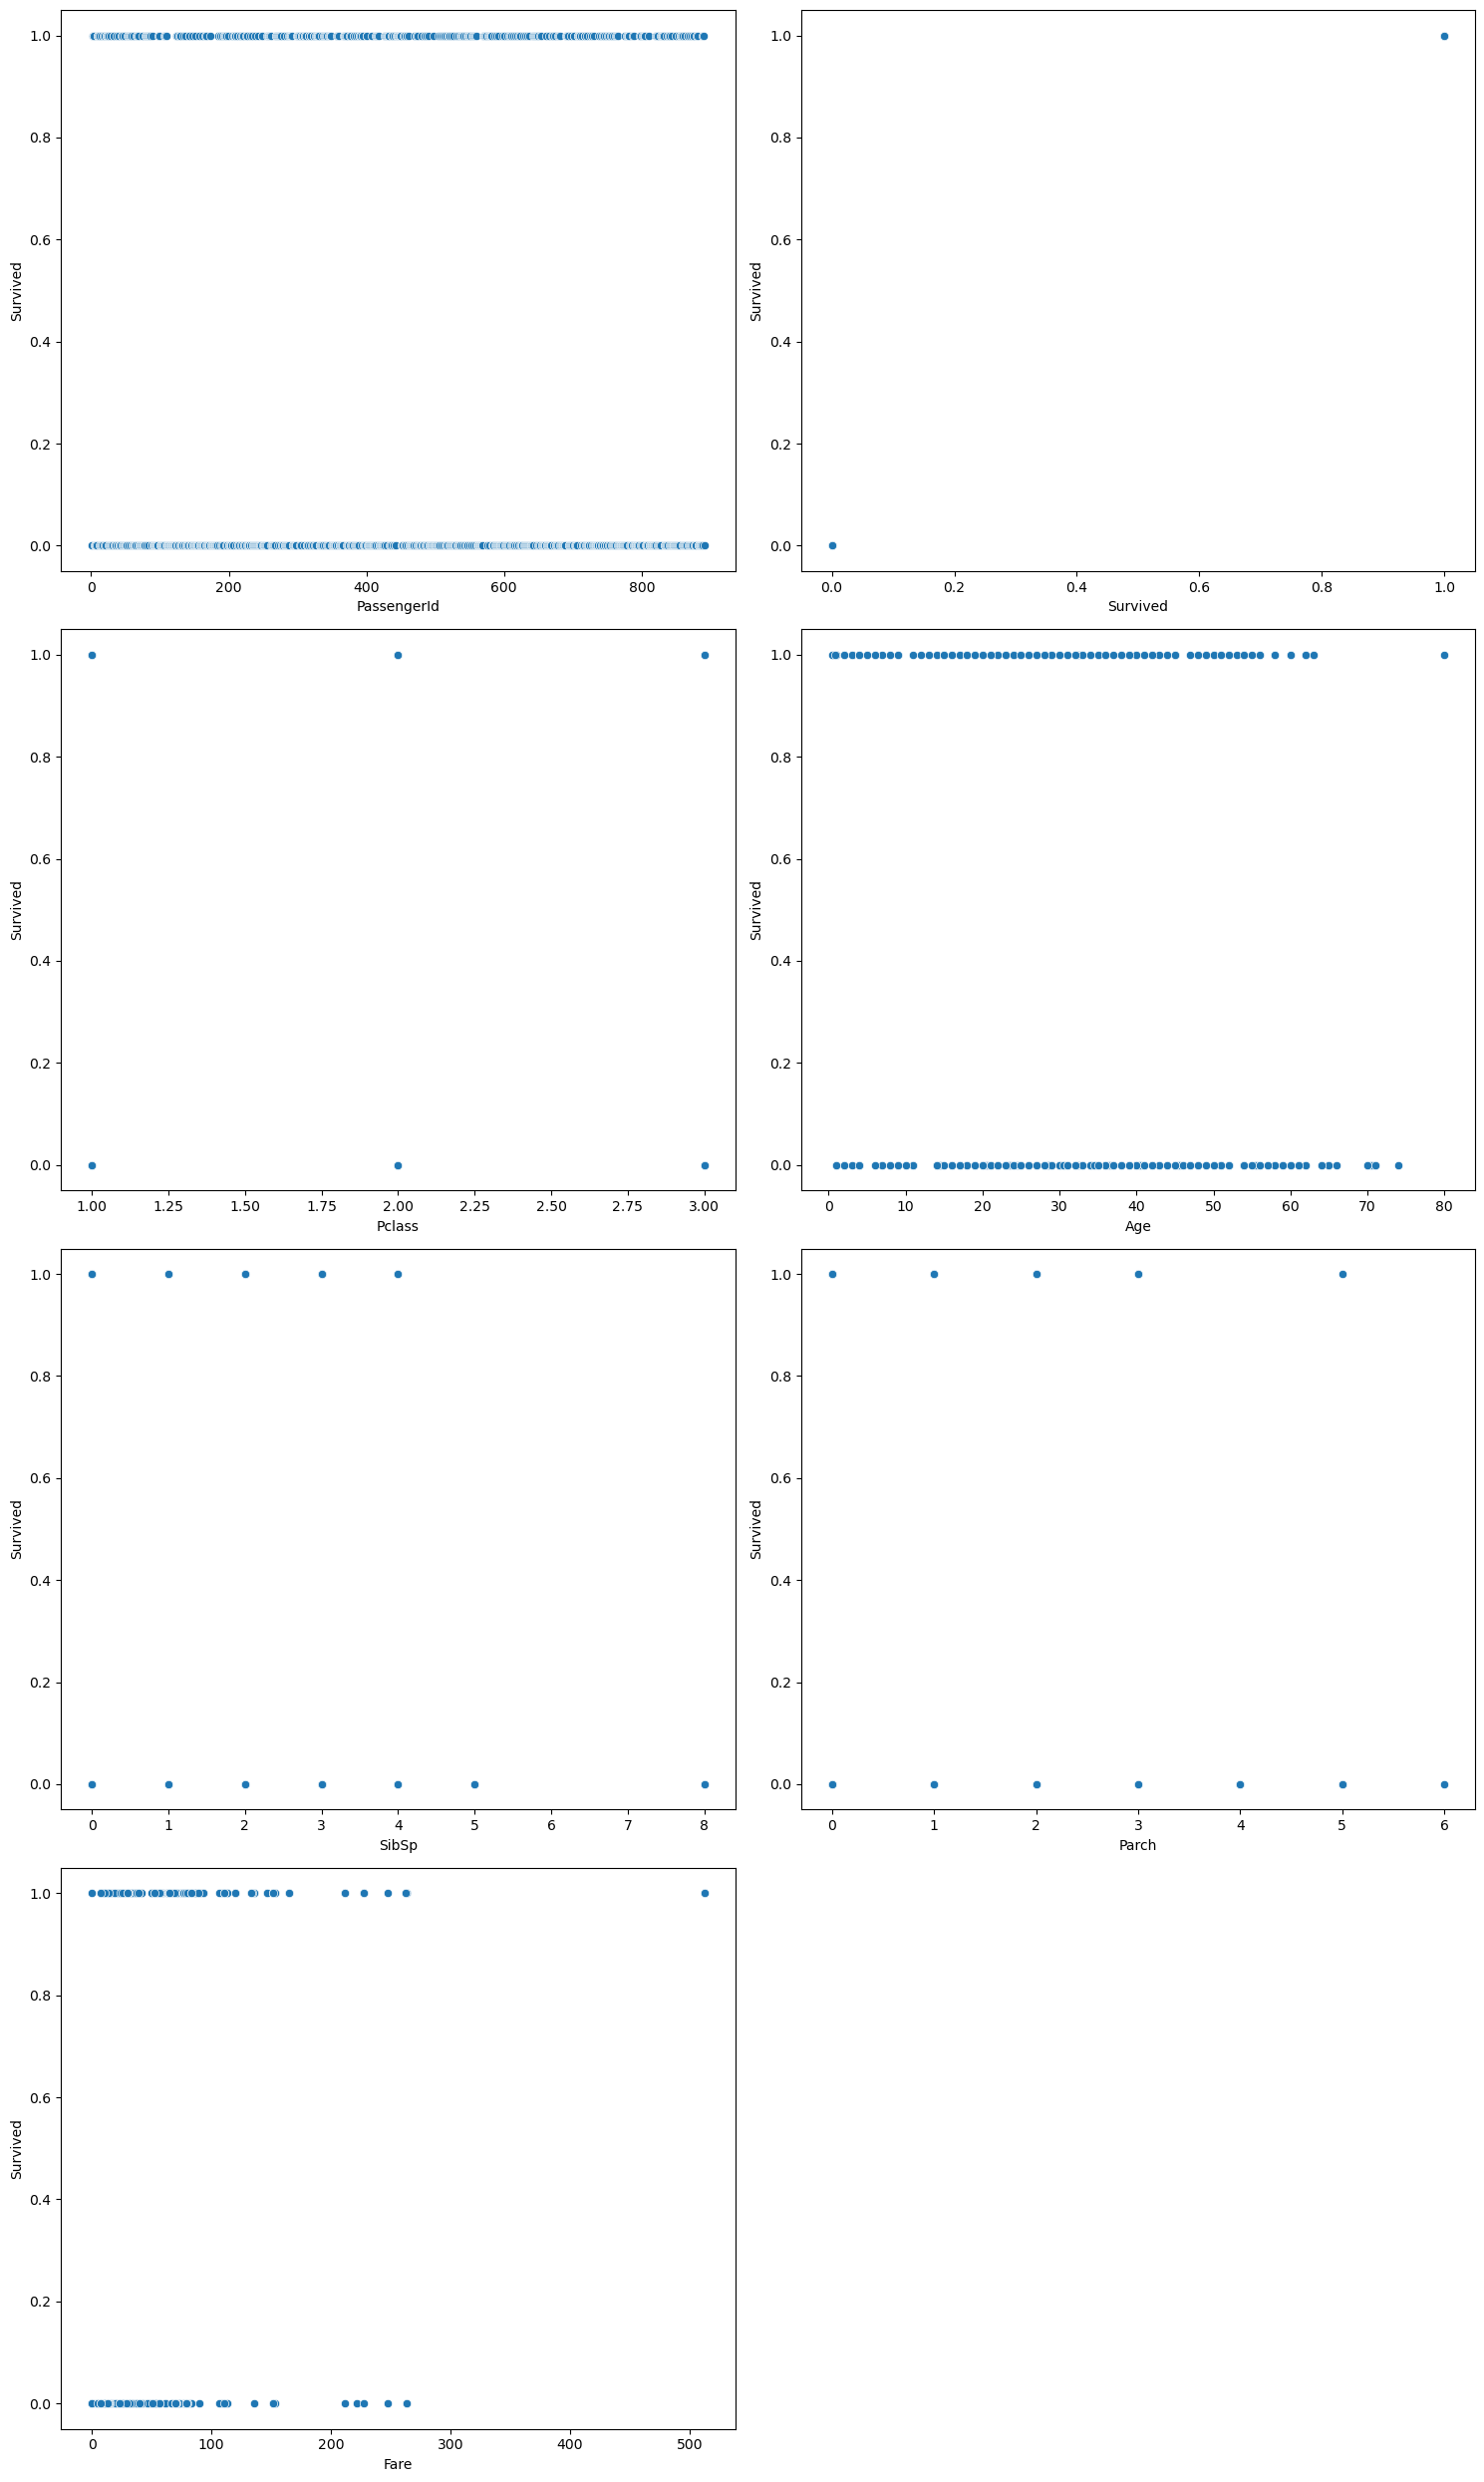

In [14]:
plt.figure(figsize=(15,25))
for i in range(0, len(numeric_features)):
    ax = plt.subplot(4,2,i+1)
    sns.scatterplot(data = df, x = numeric_features[i], y = df['Survived'])
    plt.tight_layout()

## Insights

* We can Clearly see best linear separtion between the dependent and independent values. which lead us to apply logistic regression.

## Visualizing Independent Column

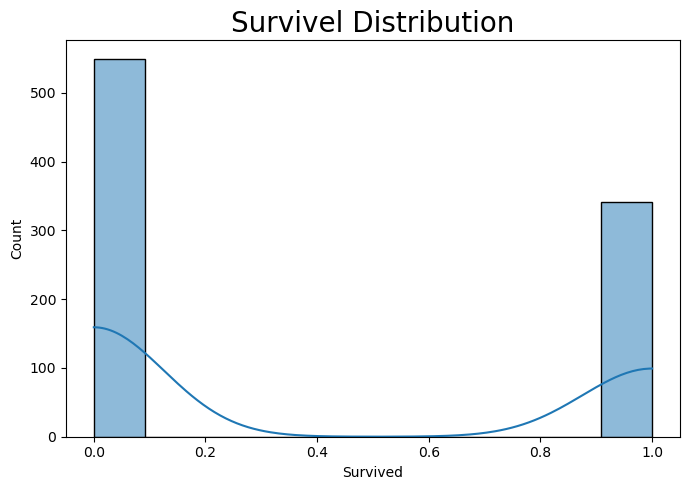

In [15]:
# Target Feature

plt.subplots(figsize = (7,5))
sns.histplot(df['Survived'], kde=True)
plt.title('Survivel Distribution', fontsize = 20)
plt.ylabel('Count')
plt.xlabel('Survived')
plt.tight_layout()
plt.show()

<Axes: >

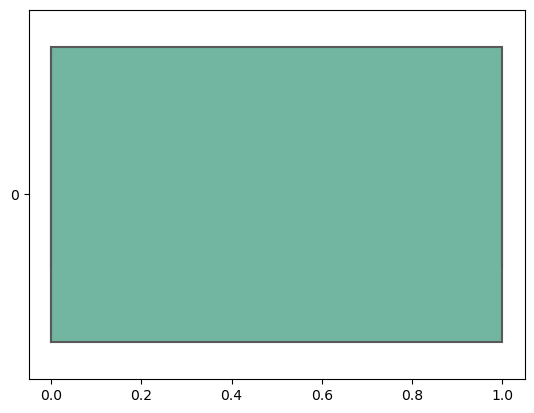

In [16]:
sns.boxplot(df['Survived'],orient='h', palette='Set2')

## Insights

* There are no outliers in Target Feature

## 2. Data Preprocessing:
* a. Handle missing values (e.g., imputation).
* b. Encode categorical variables.


In [17]:
# Data null values ceacking
import numpy as np
from sklearn.impute import SimpleImputer

feature_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]

for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean()*100,2), '% missing values')

Age 19.87 % missing values
Cabin 77.1 % missing values
Embarked 0.22 % missing values


In [18]:
#deleting unwanted columns

unwanted_feature = ['PassengerId','Name','Ticket', 'Cabin']

In [19]:
df1 = df.copy()
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df1.drop(unwanted_feature, axis=1, inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)

In [23]:
df1['Age'].isnull().sum()

0

In [24]:
# reshaping the columns

embarked = df1['Embarked'].values.reshape(-1, 1)

In [25]:
imp = SimpleImputer(strategy='most_frequent')
imp_imputed = imp.fit_transform(embarked)
embarked_imputed_list = imp_imputed.flatten().tolist()
print(embarked_imputed_list)

['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'Q', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'S',

In [26]:
df1['Embarked'] = embarked_imputed_list

In [27]:
df1['Embarked'].isnull().sum()

0

In [28]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
# Appyling Label encoder
from sklearn.preprocessing import LabelEncoder

for i in range(0, len(categorical_columns)):
    df1[categorical_columns[i]] = LabelEncoder().fit_transform(df1[categorical_columns[i]])

In [30]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [31]:
target_feature = 'Survived'
numeric_features_df1 = [x for x in numeric_features if x in df1.columns]
numeric_features_df1.remove(target_feature)

In [32]:
numeric_features_df1

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

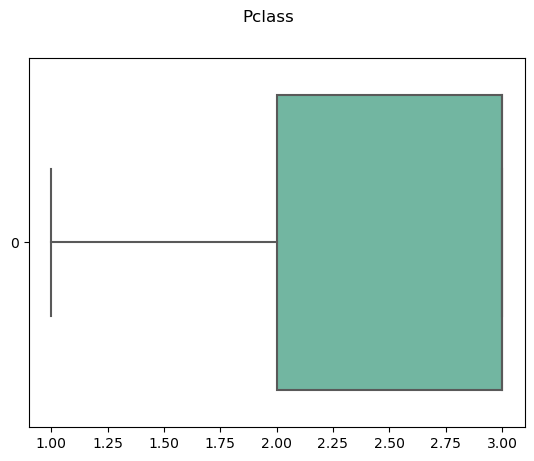

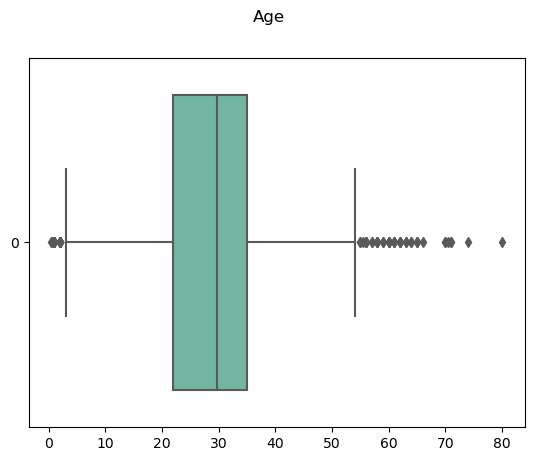

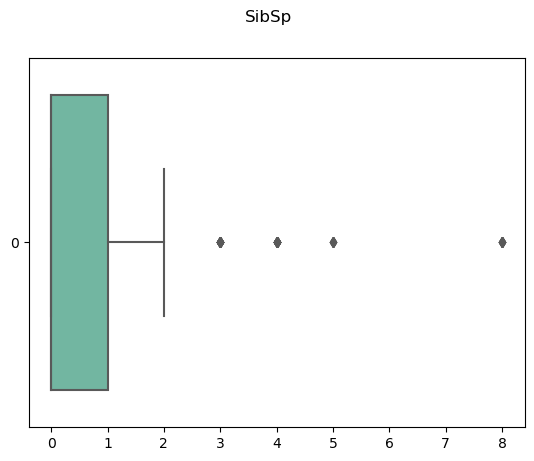

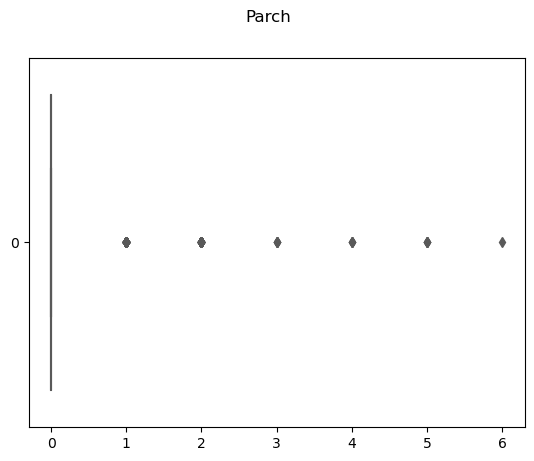

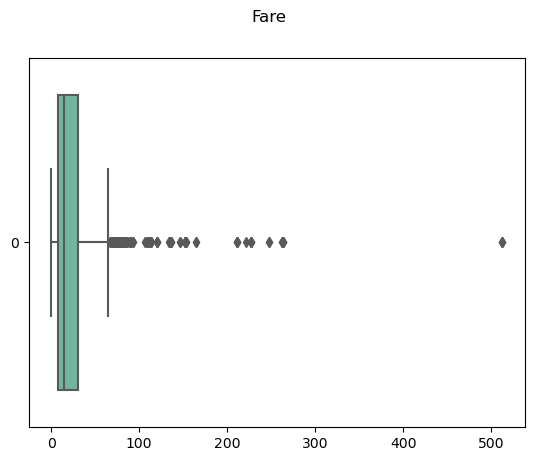

In [33]:
for i in numeric_features_df1:
    sns.boxplot(df1[i], orient='h', palette='Set2')
    plt.suptitle(i)
    plt.show()

C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\621416497.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= df1[numeric_features_df1[i]], color = 'b', shade = True)
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\621416497.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= df1[numeric_features_df1[i]], color = 'b', shade = True)
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\621416497.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mobin\AppData\Local\Temp\ipykernel_26736\621416497.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x= df1[numeric_features_df1[i]], 

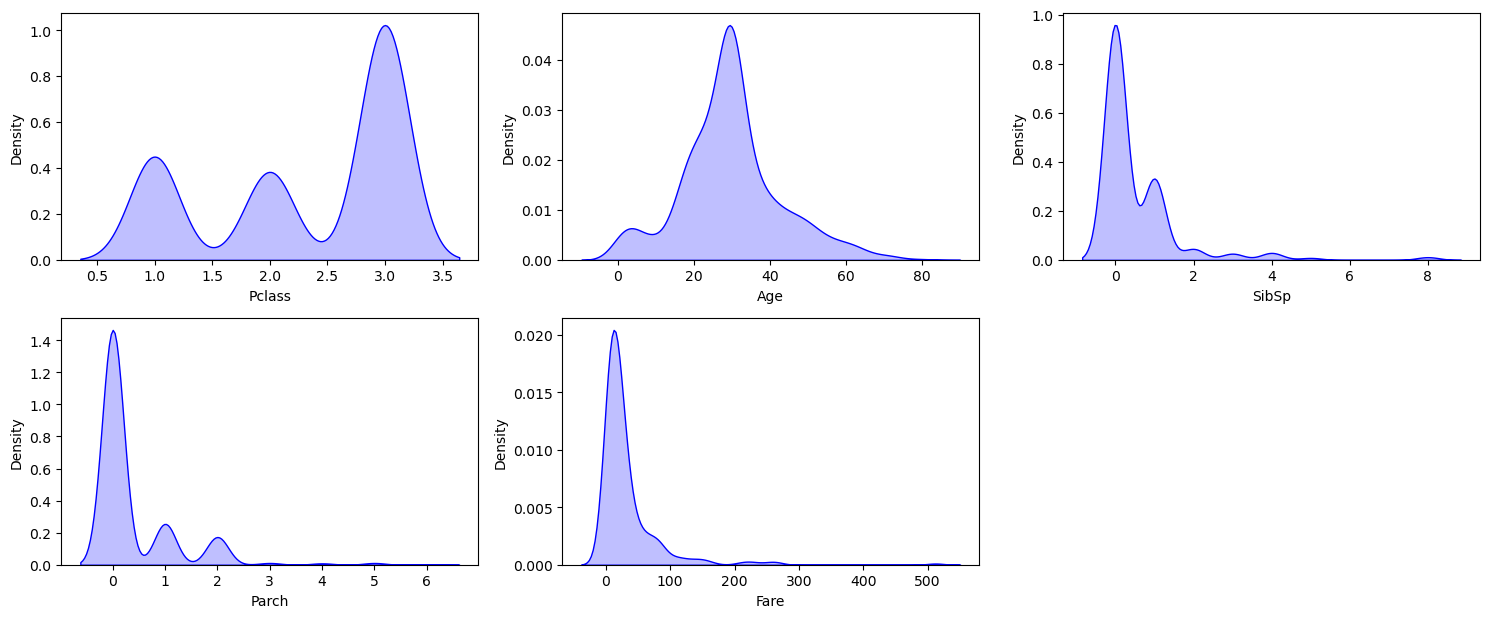

In [34]:
plt.figure(figsize=(15,15))


for i in range(0, len(numeric_features_df1)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x= df1[numeric_features_df1[i]], color = 'b', shade = True)
    plt.xlabel(numeric_features_df1[i])
    plt.tight_layout()

In [35]:
df1[numeric_features_df1].skew()

Pclass   -0.630548
Age       0.434488
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

In [36]:
unwanted_feature

['PassengerId', 'Name', 'Ticket', 'Cabin']

## 3. Model Building:
* a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
* b. Train the model using the training data.


In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBRFClassifier

## Splitting X and Y

In [38]:
unwanted_feature

['PassengerId', 'Name', 'Ticket', 'Cabin']

In [39]:
df.drop(columns=unwanted_feature, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
X = df.drop('Survived', axis = 1)
Y = df['Survived']

In [42]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [43]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=15)

In [45]:
numeric_features_df1

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [46]:
#defining numerical features

numeric_features = [x for x in numeric_features_df1 if x in numeric_features]

In [47]:
(numeric_features), (categorical_columns)

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [48]:
#  Creating Pipelines


numeric_features_pipeline = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='mean'))]
)

categorical_features_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('One_hot_Encoder', OneHotEncoder()), 
        
            ])

processor = ColumnTransformer(
    [
        
    ('Numeric Pipeline', numeric_features_pipeline,numeric_features),
    ('Categorical Pipeline', categorical_features_pipeline, categorical_columns)
    ]
)


In [49]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

In [50]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'XGboost': XGBRFClassifier(),
    'Catboost': CatBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [51]:
# Functions which Takes true and Predicted Values to calculate metrics


def evaluate_class(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [52]:
# function which create and evaluate models
def evaluate_models(X_train,X_test,y_train,y_test, models):

    models_list = []
    r2_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train) # training the model

        # make prediction
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_mae, model_train_rmse, model_train_r2 = evaluate_class(y_train, y_train_pred)
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_class(y_test, y_test_pred)
        
        try:
            print(list(models.keys())[i])
            models_list.append(list(model.keys())[i])
        except IndexError:
            print("Index out of range error. List might be shorter than expected.")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)
        print('='*35)
        print('\n')

        report = pd.DataFrame(list(zip(models_list,r2_list)), columns=['Model Name', 'R2 Score'])

    return report

In [53]:
base_report = evaluate_models(X_train,X_test,y_train,y_test,models)

C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
An unexpected error occurred: 'LogisticRegression' object has no attribute 'keys'
Model performance for Training set
- Root Mean Squared Error: 0.4482
- Mean Absolute Error: 0.2008
- R2 Score: 0.1418
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4358
- Mean Absolute Error: 0.1899
- R2 Score: 0.2225


SVM
An unexpected error occurred: 'SVC' object has no attribute 'keys'
Model performance for Training set
- Root Mean Squared Error: 0.5634
- Mean Absolute Error: 0.3174
- R2 Score: -0.3564
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5543
- Mean Absolute Error: 0.3073
- R2 Score: -0.2577


KNeighbors
An unexpected error occurred: 'KNeighborsClassifier' object has no attribute 'keys'
Model performance for Training set
- Root Mean Squared Error: 0.4681
- Mean Absolute Error: 0.2191
- R2 Score: 0.0638
----------------------------------
Model performance for Test set
- Root M

## Logistic Regression Model

In [54]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [55]:
x = df1.drop('Survived', axis = 1)
y = df1['Survived']

In [56]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [57]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2, random_state=15)

## Model Building

In [58]:

model = LogisticRegression()
model.fit(X_train1,y_train1)

C:\Users\mobin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
pred_y = model.predict(X_test1)

In [60]:
pred_y

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

## 4. Model Evaluation:
* a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

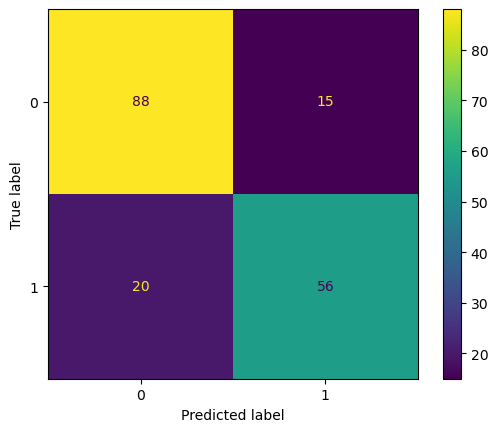

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test1,pred_y), display_labels=model.classes_)
disp.plot()
plt.show()

In [62]:
confusion_matrix(y_test1,pred_y)

array([[88, 15],
       [20, 56]], dtype=int64)

In [68]:
print(classification_report(y_test1,pred_y))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.79      0.74      0.76        76

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



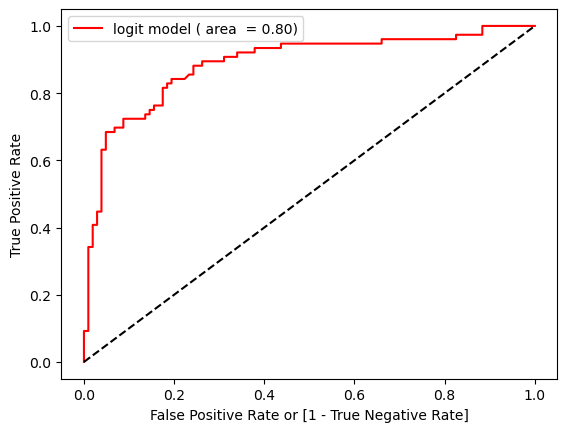

In [73]:
# ROC Curve

fpr,tpr, thresholds = roc_curve(y_test1,model.predict_proba(X_test1)[: , 1])
auc = roc_auc_score(y_test1,pred_y)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [74]:
print(auc)

0.7956055186509965
